In [1]:
from datetime import datetime, time, timedelta
import glob

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import weather

In [13]:
files = glob.glob("weather_results/*.csv")
len(files)

105

In [28]:
files_092017 = [f for f in files if "-09-" in f]
dfs = [pd.read_csv(f, names=["dt", "mean"], header=None, skiprows=[0]) for f in files_092017]
dfs = [df for df in dfs if len(df) > 0]


def process_ts0(df):
    t0 = df["dt"].iloc[0]
    if t0.time() < time(7):
        t0 = datetime.combine(t0.date() - timedelta(days=1), time(21))
    return (df["dt"] - t0).dt.total_seconds()

for df in dfs:
    df["dt"] = pd.to_datetime(df["dt"])
    df.sort_values("dt", inplace=True)
    df["ts0"] = process_ts0(df)
    df.set_index("ts0", inplace=True)
    print(df.iloc[0]["dt"].date(), ": ", len(df))

2017-09-01 :  2423
2017-09-02 :  2771
2017-09-03 :  2843
2017-09-04 :  2767
2017-09-06 :  187
2017-09-06 :  2330
2017-09-09 :  606
2017-09-10 :  1663
2017-09-12 :  3148
2017-09-13 :  3150
2017-09-14 :  3148
2017-09-15 :  3150
2017-09-16 :  3150
2017-09-17 :  3150
2017-09-18 :  3150
2017-09-19 :  3150
2017-09-20 :  3150
2017-09-21 :  3150
2017-09-22 :  3150
2017-09-23 :  2921
2017-09-24 :  3133
2017-09-25 :  3149
2017-09-26 :  3149
2017-09-27 :  3150
2017-09-28 :  3150
2017-09-29 :  3150
2017-09-30 :  3150


2017-09-12 :  0.00012452601623278825
2017-09-13 :  0.0035997481641800015
2017-09-14 :  0.00033464197061928953
2017-09-15 :  0.00015837497429405884
2017-09-16 :  0.000971010833990398
2017-09-17 :  0.0014305065323478227
2017-09-18 :  0.0013915092812383989
2017-09-19 :  0.0008313267137408306
2017-09-20 :  0.00012197226475393971
2017-09-21 :  0.00013529800536484968
2017-09-22 :  0.00016247330431548687
2017-09-23 :  0.00023767586437756872
2017-09-24 :  0.0002943976713998503
2017-09-25 :  0.0004371118925210232
2017-09-26 :  0.00020690255150260183
2017-09-27 :  0.002196046848825718
2017-09-28 :  0.00011189283296901721
2017-09-29 :  0.0002423257562479105
2017-09-30 :  0.0011067150540866777


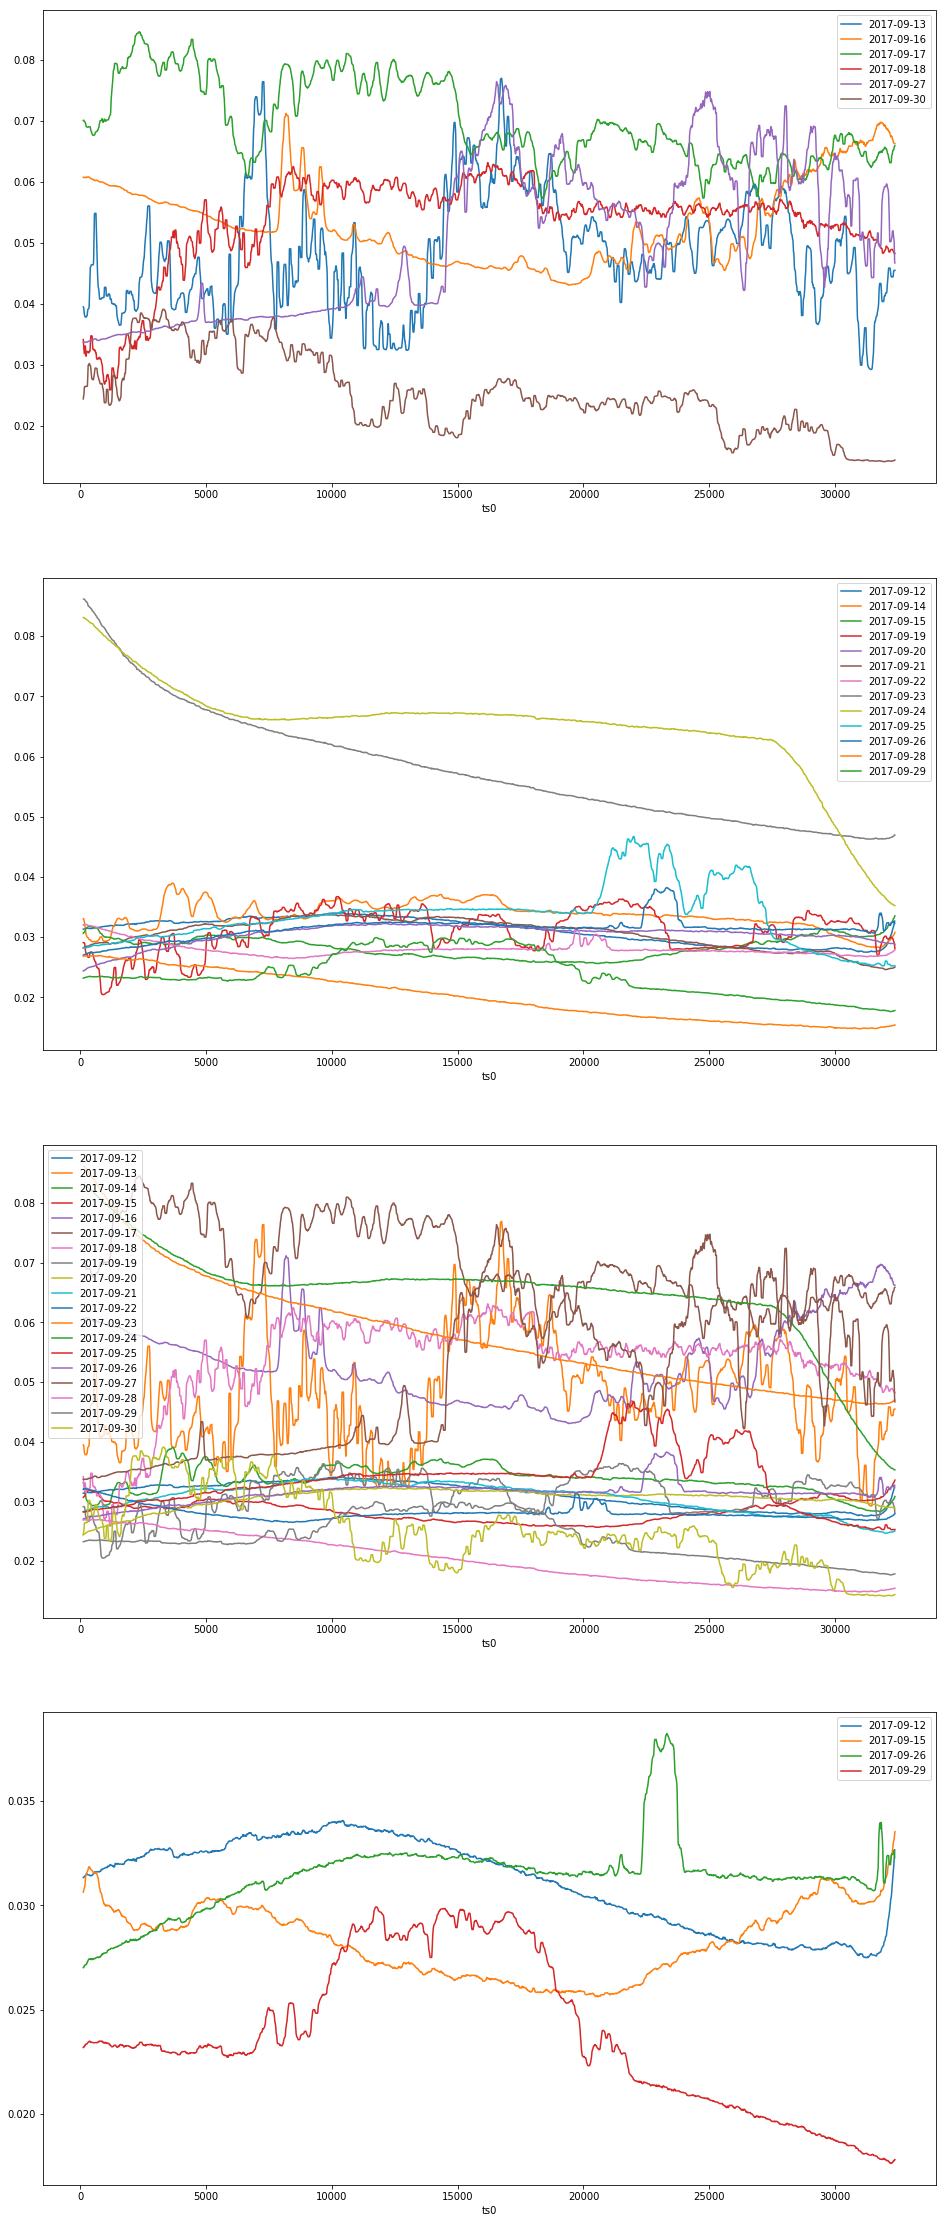

In [38]:
# TODO: fix t=0 offset
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 40))

for df in dfs:
    if df.iloc[0]["dt"].date() < date(2017, 9, 12):
        continue
    rsm = df["mean"].rolling(50).std().mean()
    if rsm > .0009:
        df["mean"].rolling(12).median().plot(ax=ax1, label=df.iloc[0]["dt"].date())
    else:
        df["mean"].rolling(12).median().plot(ax=ax2, label=df.iloc[0]["dt"].date())

    df["mean"].rolling(12).median().plot(ax=ax3, label=df.iloc[0]["dt"].date())
    print(df.iloc[0]["dt"].date(), ": ", rsm)
    if df.iloc[0]["dt"].date() in {date(2017, 9, 12), date(2017, 9, 26), date(2017, 9, 15), date(2017, 9, 29),}:
        df["mean"].rolling(12).median().plot(ax=ax4, label=df.iloc[0]["dt"].date())

[ax.legend() for ax in (ax1, ax2, ax3, ax4)]

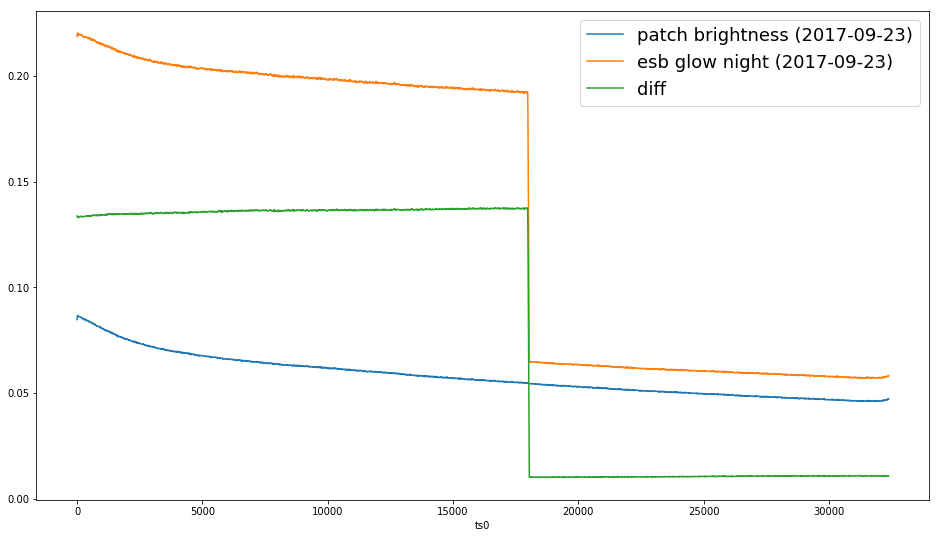

In [48]:
# df3 = pd.read_csv("weather_results/2017-09-22.csv0", names=["dt", "mean"], header=None, skiprows=[0])
# df3["dt"] = pd.to_datetime(df3["dt"])
# df3.sort_values("dt", inplace=True)
# df3["ts0"] = (df3["dt"] - df3["dt"].iloc[0]).dt.total_seconds()
# df3.set_index("ts0", inplace=True)
# df3["mean"].plot(label='esb no glow night (2017-09-22)', figsize=(16, 9))

df1 = pd.read_csv("weather_results/2017-09-23.csv", names=["dt", "mean"], header=None, skiprows=[0])
df1.dt = pd.to_datetime(df1.dt)
df1.sort_values("dt", inplace=True)
df1["ts0"] = (df1["dt"] - df1["dt"].iloc[0]).dt.total_seconds()
df1.set_index("ts0", inplace=True)
df1["mean"].plot(label="patch brightness (2017-09-23)", figsize=(16, 9))

ax = df2["mean"].plot(label="esb glow night (2017-09-23)")

df2 = pd.read_csv("weather_results/2017-09-23.csv0", names=["dt", "mean"], header=None, skiprows=[0])
df2["dt"] = pd.to_datetime(df2["dt"])
df2.sort_values("dt", inplace=True)
df2["ts0"] = (df2["dt"] - df2["dt"].iloc[0]).dt.total_seconds()
df2.set_index("ts0", inplace=True)
(df2["mean"] - df1["mean"]).plot(label='diff')
ax.legend(fontsize=18)

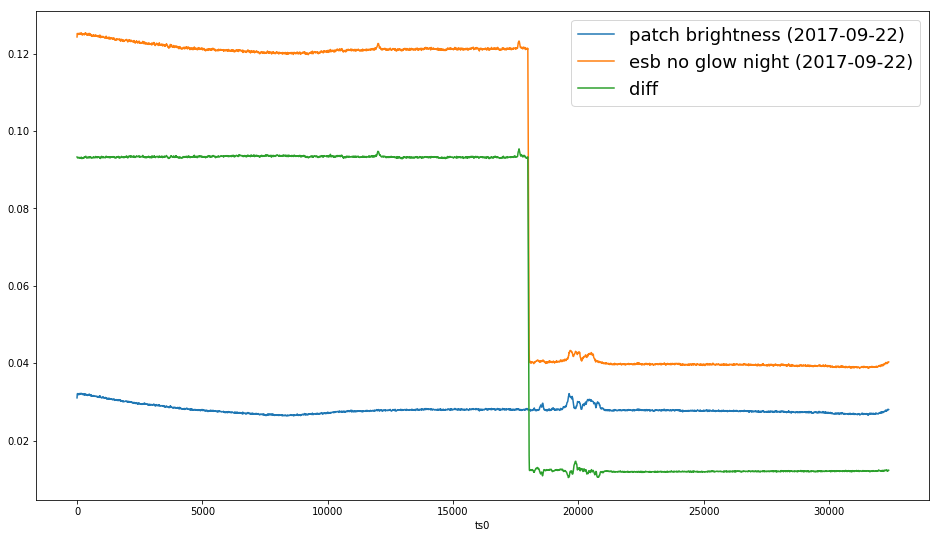

In [42]:
df1 = pd.read_csv("weather_results/2017-09-22.csv", names=["dt", "mean"], header=None, skiprows=[0])
df1.dt = pd.to_datetime(df1.dt)
df1.sort_values("dt", inplace=True)
df1["ts0"] = (df1["dt"] - df1["dt"].iloc[0]).dt.total_seconds()
df1.set_index("ts0", inplace=True)
ax = df1["mean"].plot(label="patch brightness (2017-09-22)")


df3 = pd.read_csv("weather_results/2017-09-22.csv0", names=["dt", "mean"], header=None, skiprows=[0])
df3["dt"] = pd.to_datetime(df3["dt"])
df3.sort_values("dt", inplace=True)
df3["ts0"] = (df3["dt"] - df3["dt"].iloc[0]).dt.total_seconds()
df3.set_index("ts0", inplace=True)
df3["mean"].plot(label='esb no glow night (2017-09-22)', figsize=(16, 9))

(df3["mean"] - df1["mean"]).plot(label='diff')
ax.legend(fontsize=18)

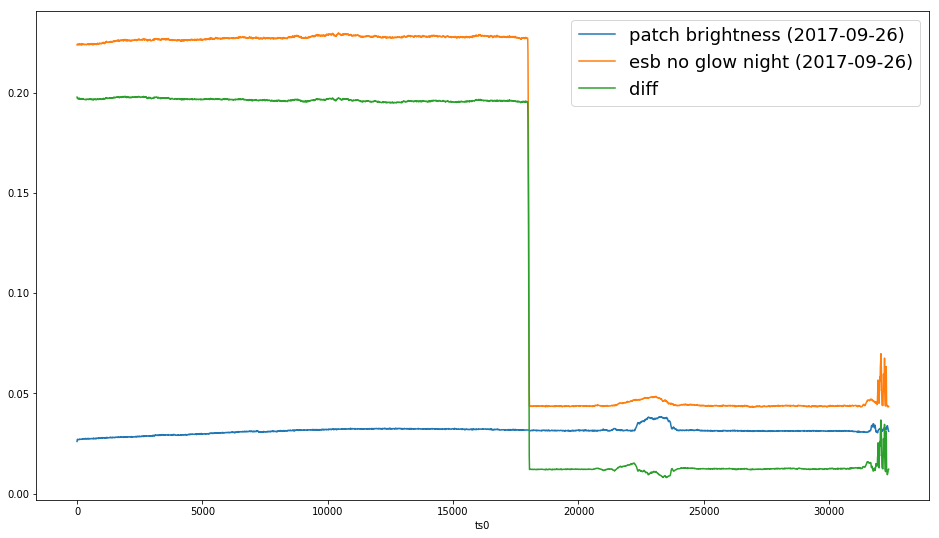

In [44]:
df1 = pd.read_csv("weather_results/2017-09-26.csv", names=["dt", "mean"], header=None, skiprows=[0])
df1.dt = pd.to_datetime(df1.dt)
df1.sort_values("dt", inplace=True)
df1["ts0"] = (df1["dt"] - df1["dt"].iloc[0]).dt.total_seconds()
df1.set_index("ts0", inplace=True)
ax = df1["mean"].plot(label="patch brightness (2017-09-26)")

df3 = pd.read_csv("weather_results/2017-09-26.csv0", names=["dt", "mean"], header=None, skiprows=[0])
df3["dt"] = pd.to_datetime(df3["dt"])
df3.sort_values("dt", inplace=True)
df3["ts0"] = (df3["dt"] - df3["dt"].iloc[0]).dt.total_seconds()
df3.set_index("ts0", inplace=True)
df3["mean"].plot(label='esb no glow night (2017-09-26)', figsize=(16, 9))

(df3["mean"] - df1["mean"]).plot(label='diff')
ax.legend(fontsize=18)


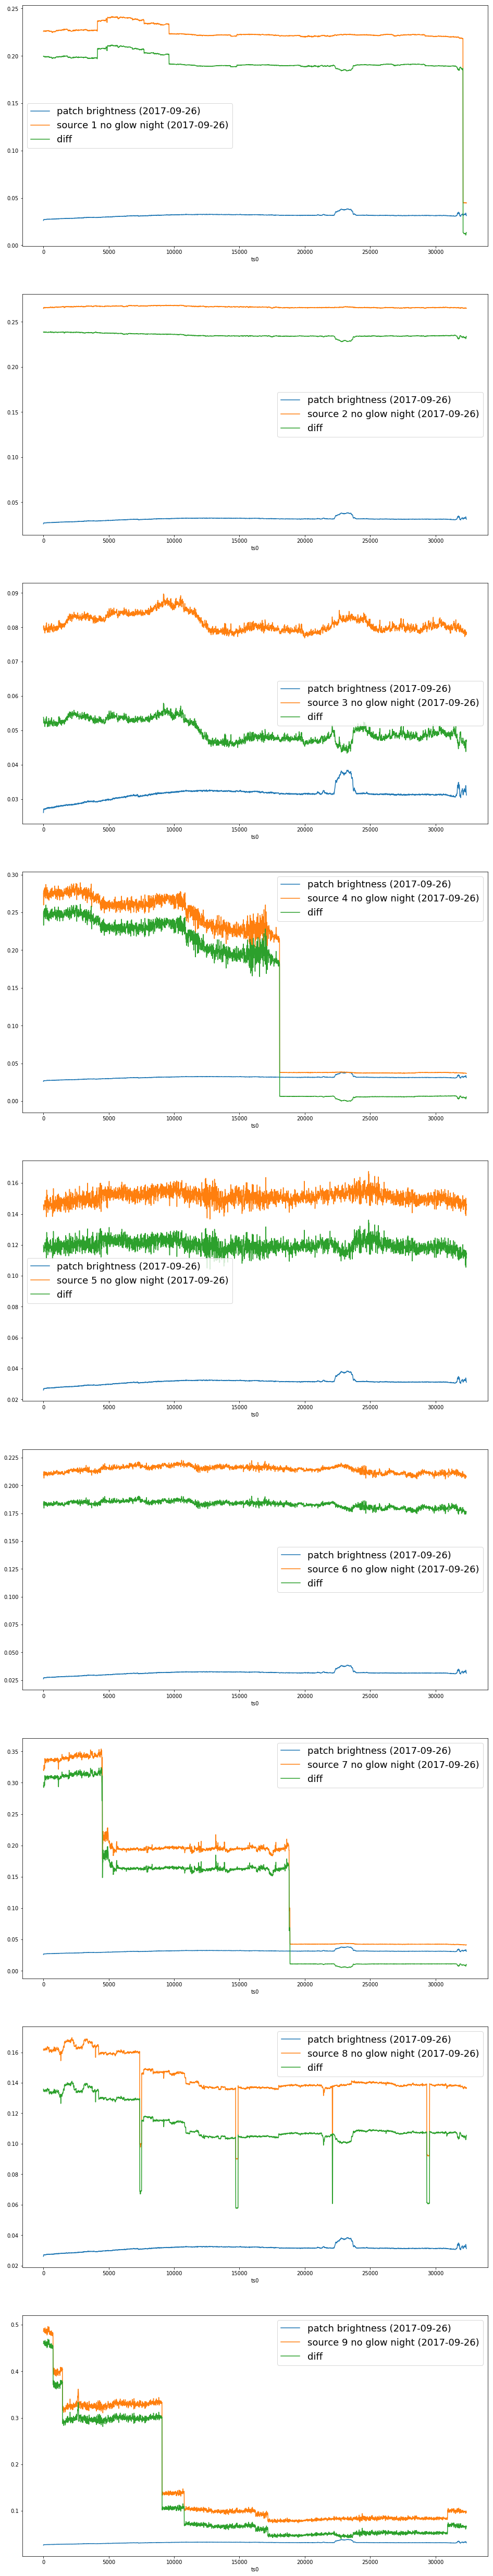

In [46]:
fig, axes = plt.subplots(9, 1, figsize=(16, 90))

for i, ax in zip(range(1, 10), axes):
    df1 = pd.read_csv("weather_results/2017-09-26.csv", 
                      names=["dt", "mean"], header=None, skiprows=[0])
    df1.dt = pd.to_datetime(df1.dt)
    df1.sort_values("dt", inplace=True)
    df1["ts0"] = (df1["dt"] - df1["dt"].iloc[0]).dt.total_seconds()
    df1.set_index("ts0", inplace=True)
    ax = df1["mean"].plot(ax=ax, label="patch brightness (2017-09-26)")

    df3 = pd.read_csv("weather_results/2017-09-26.csv{}".format(i), 
                      names=["dt", "mean"], header=None, skiprows=[0])
    df3["dt"] = pd.to_datetime(df3["dt"])
    df3.sort_values("dt", inplace=True)
    df3["ts0"] = (df3["dt"] - df3["dt"].iloc[0]).dt.total_seconds()
    df3.set_index("ts0", inplace=True)
    df3["mean"].plot(ax=ax, label='source {} no glow night (2017-09-26)'.format(i))

    (df3["mean"] - df1["mean"]).plot(ax=ax, label='diff')
    ax.legend(fontsize=18)


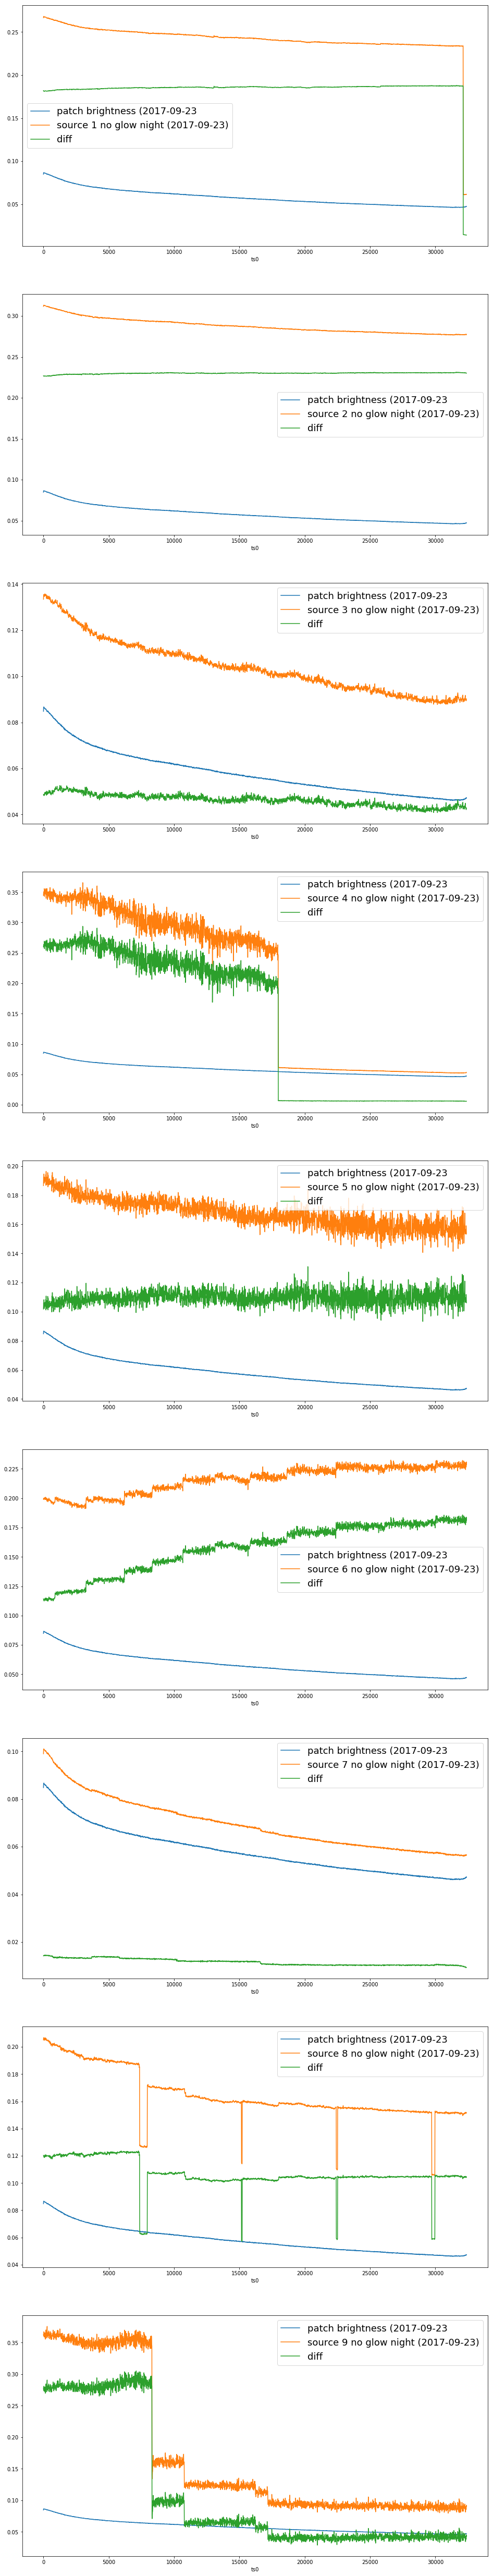

In [50]:
fig, axes = plt.subplots(9, 1, figsize=(16, 90))

for i, ax in zip(range(1, 10), axes):
    df1 = pd.read_csv("weather_results/2017-09-23.csv", 
                      names=["dt", "mean"], header=None, skiprows=[0])
    df1.dt = pd.to_datetime(df1.dt)
    df1.sort_values("dt", inplace=True)
    df1["ts0"] = (df1["dt"] - df1["dt"].iloc[0]).dt.total_seconds()
    df1.set_index("ts0", inplace=True)
    ax = df1["mean"].plot(ax=ax, label="patch brightness (2017-09-23")

    df3 = pd.read_csv("weather_results/2017-09-23.csv{}".format(i), 
                      names=["dt", "mean"], header=None, skiprows=[0])
    df3["dt"] = pd.to_datetime(df3["dt"])
    df3.sort_values("dt", inplace=True)
    df3["ts0"] = (df3["dt"] - df3["dt"].iloc[0]).dt.total_seconds()
    df3.set_index("ts0", inplace=True)
    df3["mean"].plot(ax=ax, label='source {} no glow night (2017-09-23)'.format(i))

    (df3["mean"] - df1["mean"]).plot(ax=ax, label='diff')
    ax.legend(fontsize=18)